In [1]:
#4-1
# 基本套件和模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['DFKai-sb'] 
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
# 資料模組
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
#4-2
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
#4-3
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#4-4
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
#4-5
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#4-6
df['target'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#4-7
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


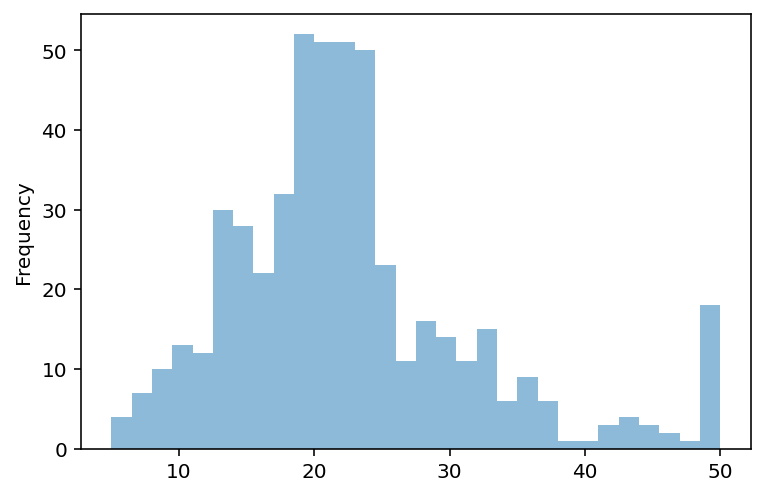

In [8]:
#4-8
df['target'].plot(kind='hist', bins=30, alpha=0.5)

In [9]:
#4-9
corr = df.corr().round(2)
corr['target'].sort_values(ascending=False)

target     1.00
RM         0.70
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
RAD       -0.38
AGE       -0.38
CRIM      -0.39
NOX       -0.43
TAX       -0.47
INDUS     -0.48
PTRATIO   -0.51
LSTAT     -0.74
Name: target, dtype: float64

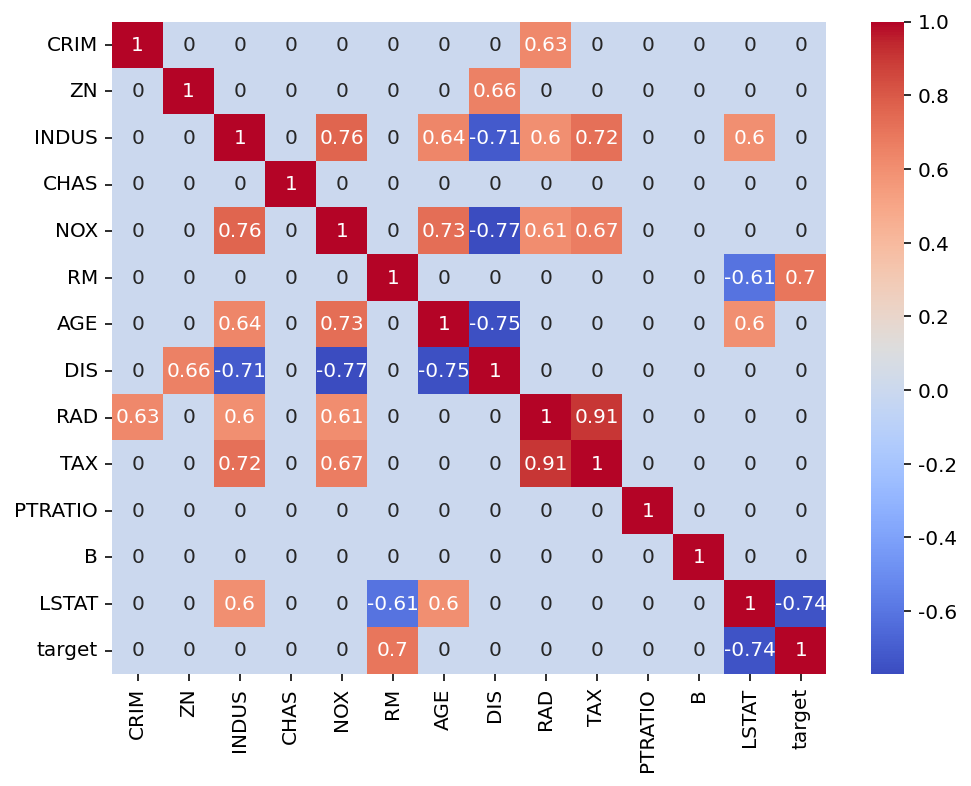

In [10]:
#4-10
plt.figure(figsize=(8, 6))
corr[np.abs(corr) < 0.6] = 0
sns.heatmap(corr, annot=True, cmap='coolwarm');

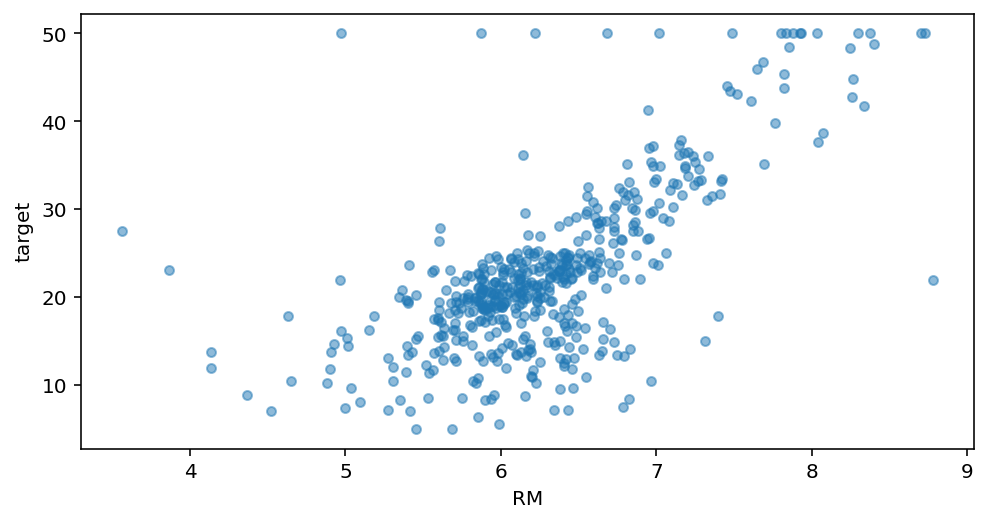

In [11]:
#4-11
df.plot(kind='scatter', x='RM', y='target', alpha=0.5, figsize=(8,4));

In [12]:
#4-12
X = df[['RM']]
y = df['target']

In [13]:
#4-13
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
#4-14
print('訓練集的筆數：',len(X_train))
print('測試集的筆數：',len(X_test))
print('測試集所佔全部資料的百分比：',len(X_test)/len(X))

訓練集的筆數： 339
測試集的筆數： 167
測試集所佔全部資料的百分比： 0.3300395256916996


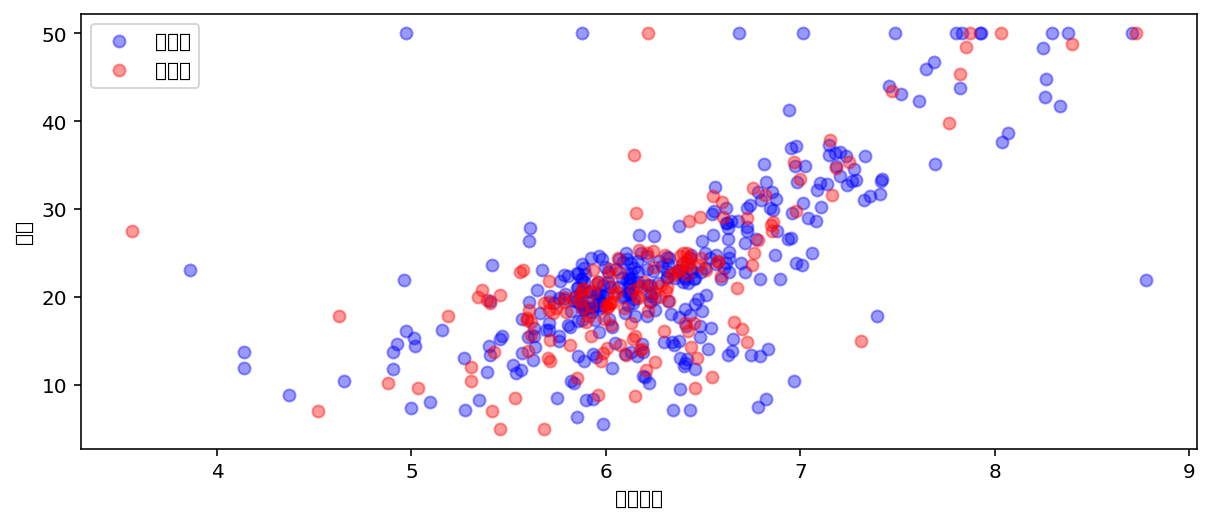

In [15]:
#4-15
plt.figure(figsize=(10,4))
plt.scatter(X_train, y_train, color='blue', alpha=0.4, label='訓練集')
plt.scatter(X_test, y_test, color='red', alpha=0.4, label='測試集')
plt.xlabel('房間數量')
plt.ylabel('房價')
plt.legend();

In [16]:
#4-16
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
#4-17
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#4-18
print(model.intercept_, model.coef_)

-34.22235234632533 [9.03907314]


In [19]:
#4-19
y_pred = model.predict(X_test)

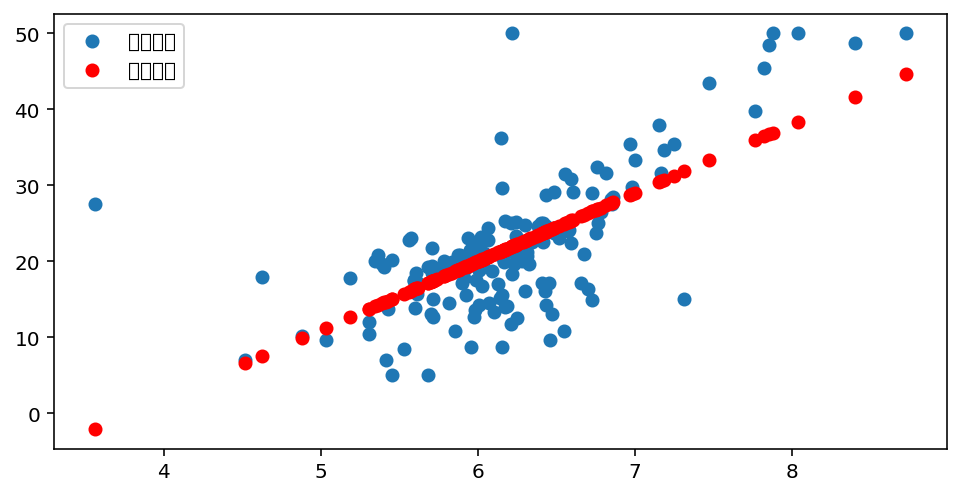

In [20]:
#4-20
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test, label='實際資料')
plt.scatter(X_test, y_pred, c='r', label='預測結果')
plt.legend()

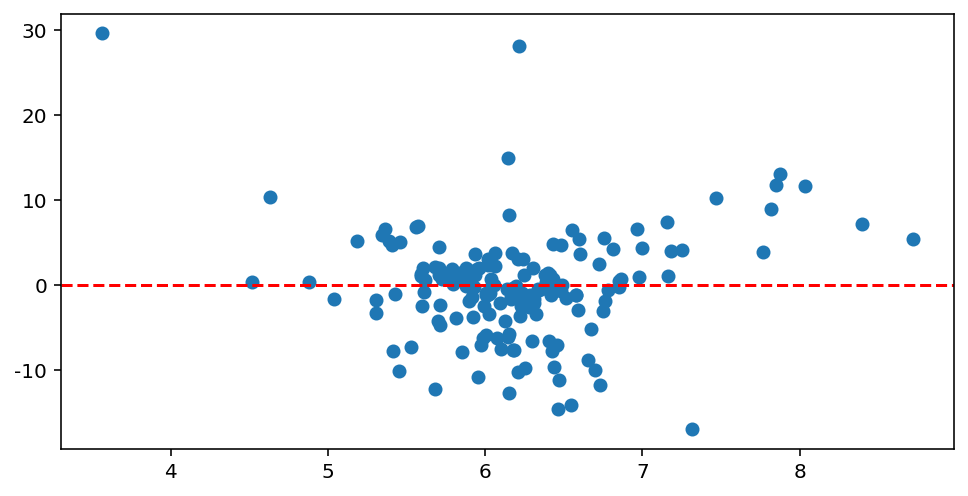

In [21]:
#4-21
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test-y_pred)
plt.axhline(0, c='r', ls='--');

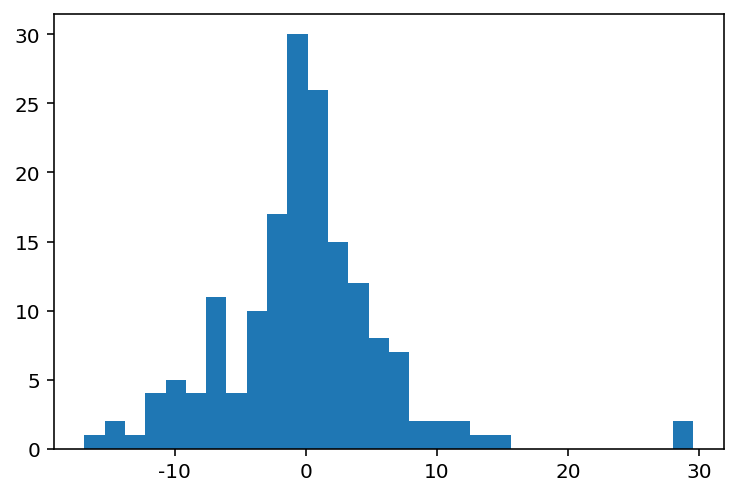

In [22]:
#4-22
plt.hist(y_test-y_pred, bins=30);

In [23]:
#4-23
df_test = pd.concat([X_test, y_test], axis=1)
df_test['y_pred'] = y_pred
df_test['error'] = df_test['target']-df_test['y_pred']
df_test['error_abs'] = np.abs(df_test['error'])
df_test.sort_values(by='error_abs', ascending=False, inplace=True)
df_test.head()

,RM,target,y_pred,error,error_abs
365,3.561,27.5,-2.034213,29.534213,29.534213
371,6.216,50.0,21.964526,28.035474,28.035474
375,7.313,15.0,31.880390,-16.880390,16.880390
181,6.144,36.2,21.313713,14.886287,14.886287
436,6.461,9.6,24.179099,-14.579099,14.579099


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


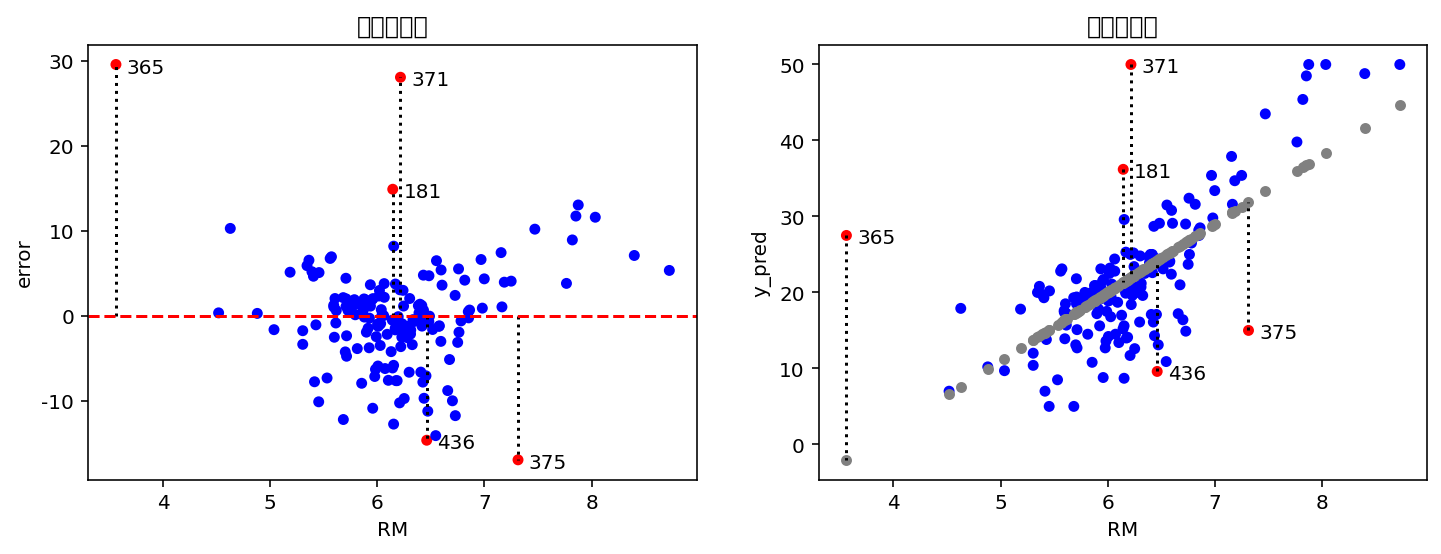

In [24]:
#4-24
colors = ['red']*5 + ['blue']*(len(df_test)-5)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
# 第一張圖
ax = axes[0]
df_test.plot(kind='scatter', x='RM', y='error', c=colors, ax=ax)
for i in df_test.index[:5]:
    ax.text(x=df_test.loc[i,'RM']+0.1, y=df_test.loc[i,'error']-1, s=i)
    ax.vlines(x=df_test.loc[i,'RM'], ymin=0, ymax=df_test.loc[i,'error'], ls=':')
ax.axhline(0, c='r', ls='--')
ax.set_title('殘差值分佈')

# 第二張圖
ax = axes[1]
df_test.plot(kind='scatter', x='RM', y='target', c=colors, ax=ax)
df_test.plot(kind='scatter', x='RM', y='y_pred', c='gray', ax=ax)
for i in df_test.index[:5]:
    ax.text(x=df_test.loc[i,'RM']+0.1, y=df_test.loc[i,'target']-1, s=i)
    ax.vlines(x=df_test.loc[i,'RM'], 
              ymin=df_test.loc[i,'target'], ymax=df_test.loc[i,'y_pred'], ls=':')
ax.set_title('實際值分佈');

In [25]:
#4-25
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 39.091051114869956
Mean Absolute Error: 4.271512885857222
R2 Score: 0.4834590168919487


In [26]:
#4-26
model.predict([[6]])

array([20.01208651])

In [27]:
#4-27
model.intercept_+ model.coef_*6

array([20.01208651])

In [28]:
#4-28
X_train['RM2'] = X_train['RM']**2
X_test['RM2'] = X_test['RM']**2
X_train.head()

,RM,RM2
478,6.185,38.254225
26,5.813,33.790969
7,6.172,38.093584
492,5.983,35.796289
108,6.474,41.912676


In [29]:
#4-29
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 31.473995415562957
Mean Absolute Error: 3.9790451133823814
R2 Score: 0.5841091996600494


In [30]:
#4-30
model_2.intercept_, model_2.coef_

(56.7981163837862, array([-19.51754517,   2.21109792]))

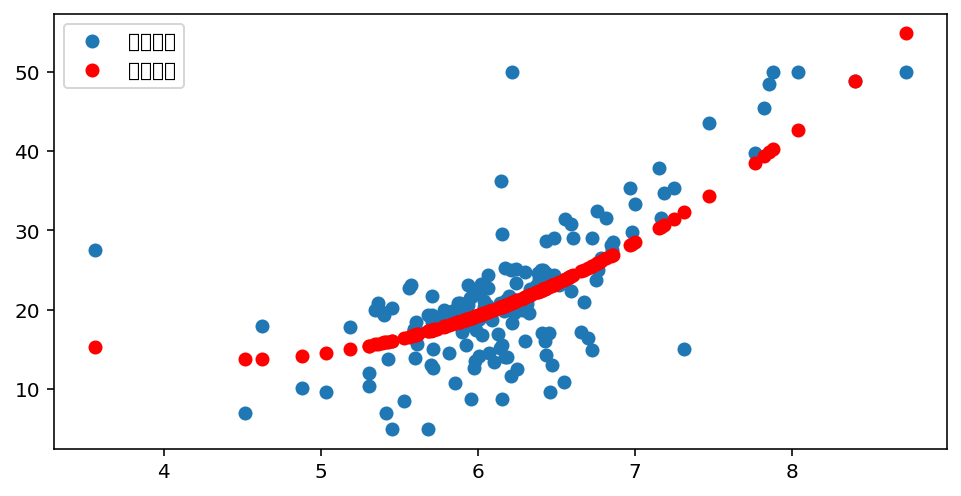

In [31]:
#4-31
plt.figure(figsize=(8,4))
plt.scatter(X_test.iloc[:,0], y_test, label='實際資料')
plt.scatter(X_test.iloc[:,0], y_pred, c='r', label='預測結果')
plt.legend();

In [32]:
#4-32
# 先將原本的二次方欄位刪除
X_train.drop('RM2', axis=1, inplace=True)
X_test.drop('RM2', axis=1, inplace=True)

# 觀察前五筆資料與手動增加的二次方項是相同的，多出來的1不用去理它
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=2)
x_poly = polynomial.fit_transform(X_train)
x_poly[:5]

array([[ 1.      ,  6.185   , 38.254225],
       [ 1.      ,  5.813   , 33.790969],
       [ 1.      ,  6.172   , 38.093584],
       [ 1.      ,  5.983   , 35.796289],
       [ 1.      ,  6.474   , 41.912676]])

In [33]:
#4-33
from sklearn.pipeline import make_pipeline
model_pl_2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_pl_2.fit(X_train, y_train)
y_pred = model_pl_2.predict(X_test)
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 31.473995415562957
Mean Absolute Error: 3.9790451133823828
R2 Score: 0.5841091996600494


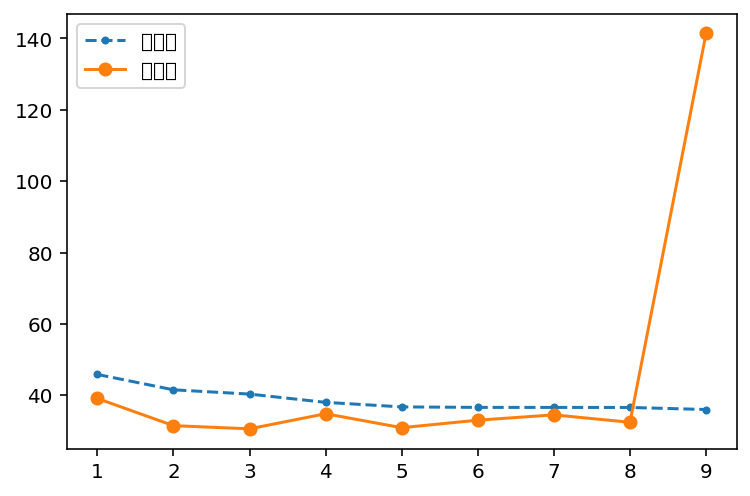

In [34]:
#4-44
errors_train = []
errors_test = []
for order in range(1, 10):
    model_pl_o = make_pipeline(PolynomialFeatures(degree=order), LinearRegression())
    model_pl_o.fit(X_train, y_train)
    y_pred = model_pl_o.predict(X_train)
    errors_train.append(mean_squared_error(y_train, y_pred))
    y_pred = model_pl_o.predict(X_test)
    errors_test.append(mean_squared_error(y_test, y_pred))
    
plt.plot(range(1,10),errors_train, marker='.', ls = '--', label='訓練集')
plt.plot(range(1,10),errors_test, marker='o', label='測試集')
plt.legend();